# Without speaker names

In [ ]:
# upload audio file
from google.colab import files
uploaded = files.upload()
path = next(iter(uploaded))

Saving pavan record_Audio Denoise (Joined by Happy Scribe).mp3 to pavan record_Audio Denoise (Joined by Happy Scribe) (3).mp3


In [ ]:
num_speakers = 2 #@param {type:"integer"}

language = 'English' #@param ['any', 'English']

model_size = 'large' #@param ['tiny', 'base', 'small', 'medium', 'large']


model_name = model_size
if language == 'English' and model_size != 'large':
  model_name += '.en'


In [ ]:
# Install Whisper from PyPI
!pip install openai-whisper

# Install PyAnnote Audio from PyPI

!pip install pyannote.audio


import whisper
import datetime

import subprocess

import torch
import pyannote.audio
from pyannote.audio.pipelines.speaker_verification import PretrainedSpeakerEmbedding
embedding_model = PretrainedSpeakerEmbedding(
    "speechbrain/spkrec-ecapa-voxceleb",
    device=torch.device("cuda"))

from pyannote.audio import Audio
from pyannote.core import Segment

import wave
import contextlib

from sklearn.cluster import AgglomerativeClustering
import numpy as np

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/root/.cache/torch/pyannote/speechbrain/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in /root/.cache/torch/pyannote/speechbrain.
INFO:speechbrain.utils.fetching:Fetch embedding_model.ckpt: Using symlink found at '/root/.cache/torch/pyannote/speechbrain/embedding_model.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["embedding_model"] = /root/.cache/torch/pyannote/speechbrain/embedding_model.ckpt
INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Using symlink found at '/root/.cache/torch/pyannote/speechbrain/mean_var_norm_emb.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["mean_var_norm_emb"] = /root/.cache/torch/pyannote/speechbrain/mean_var_norm_

In [ ]:
if path[-3:] != 'wav':
  subprocess.call(['ffmpeg', '-i', path, 'audio.wav', '-y'])
  path = 'audio.wav'

In [ ]:
model = whisper.load_model(model_size)

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 8.12 MiB is free. Process 93622 has 14.73 GiB memory in use. Of the allocated memory 14.06 GiB is allocated by PyTorch, and 547.34 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
result = model.transcribe(path)
segments = result["segments"]

In [ ]:
with contextlib.closing(wave.open(path,'r')) as f:
  frames = f.getnframes()
  rate = f.getframerate()
  duration = frames / float(rate)

In [ ]:
audio = Audio()

def segment_embedding(segment):
  start = segment["start"]
  # Whisper overshoots the end timestamp in the last segment
  end = min(duration, segment["end"])
  clip = Segment(start, end)
  waveform, sample_rate = audio.crop(path, clip)
  return embedding_model(waveform[None])

In [ ]:
embeddings = np.zeros(shape=(len(segments), 192))
for i, segment in enumerate(segments):
  embeddings[i] = segment_embedding(segment)

embeddings = np.nan_to_num(embeddings)

In [ ]:
clustering = AgglomerativeClustering(num_speakers).fit(embeddings)
labels = clustering.labels_
for i in range(len(segments)):
  segments[i]["speaker"] = 'SPEAKER ' + str(labels[i] + 1)

In [ ]:
def time(secs):
  return datetime.timedelta(seconds=round(secs))

f = open("transcript.txt", "w")

for (i, segment) in enumerate(segments):
  if i == 0 or segments[i - 1]["speaker"] != segment["speaker"]:
    f.write("\n" + segment["speaker"] + ' ' + str(time(segment["start"])) + '\n')
  f.write(segment["text"][1:] + ' ')
f.close()

# with speaker names

In [ ]:
# Install Whisper from PyPI
!pip install openai-whisper

# Install PyAnnote Audio from PyPI

!pip install pyannote.audio


In [ ]:
# Upload the mixed audio file
from google.colab import files
uploaded = files.upload()
path = next(iter(uploaded))  # This will be your mixed audio file

Saving pavan record_Audio Denoise (Joined by Happy Scribe).mp3 to pavan record_Audio Denoise (Joined by Happy Scribe) (2).mp3


In [ ]:
# Set number of speakers
num_speakers = 4 # Only two speakers in this case

# Model settings
language = 'English'
model_size = 'large'
model_name = model_size
if language == 'English' and model_size != 'large':
    model_name += '.en'

In [ ]:
# Python imports
import whisper
import datetime
import subprocess
import torch
import numpy as np
import wave
import contextlib

from pyannote.audio import Audio
from pyannote.audio.pipelines.speaker_verification import PretrainedSpeakerEmbedding
from pyannote.core import Segment
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _speechbrain_save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _speechbrain_load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _recover


In [ ]:
model = whisper.load_model(model_size)

In [ ]:
import os
# Transcribe audio
result = model.transcribe(path)
segments = result["segments"]

# if not path.lower().endswith('.wav'):
new_path = os.path.splitext(path)[0] + '.wav'
subprocess.call(['ffmpeg', '-i', path, new_path, '-y'])
path = new_path

# Get audio duration
with contextlib.closing(wave.open(path, 'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)

In [ ]:
from pprint import pprint

pprint(segments)

[{'avg_logprob': -0.25210704055486943,
  'compression_ratio': 1.5772058823529411,
  'end': 2.72,
  'id': 0,
  'no_speech_prob': 0.07406743615865707,
  'seek': 0,
  'start': 0.0,
  'temperature': 0.0,
  'text': ' Forests provide habitats for a vast variety of wildlife.',
  'tokens': [50365,
             18124,
             82,
             2893,
             42159,
             337,
             257,
             8369,
             5673,
             295,
             19199,
             13,
             50501]},
 {'avg_logprob': -0.25210704055486943,
  'compression_ratio': 1.5772058823529411,
  'end': 6.640000000000001,
  'id': 1,
  'no_speech_prob': 0.07406743615865707,
  'seek': 0,
  'start': 3.2800000000000002,
  'temperature': 0.0,
  'text': ' Trees support ecosystems where birds, insects and animals thrive.',
  'tokens': [50529,
             314,
             4856,
             1406,
             32647,
             689,
             9009,
             11,
             20201,
    

In [ ]:
# Load audio interface
audio = Audio()

# Get embedding model
embedding_model = PretrainedSpeakerEmbedding(
    "speechbrain/spkrec-ecapa-voxceleb",
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
)

# Get embeddings for each Whisper segment
def segment_embedding(segment):
    start = segment["start"]
    end = min(duration, segment["end"])
    clip = Segment(start, end)
    waveform, sample_rate = audio.crop(path, clip)
    # Convert stereo audio to mono by averaging channels if needed
    waveform = waveform.mean(axis=0, keepdims=True)  # Average across channels
    return embedding_model(waveform[None])[0]

# Generate embeddings
embeddings = np.zeros((len(segments), 192))
for i, segment in enumerate(segments):
    embeddings[i] = segment_embedding(segment)
embeddings = np.nan_to_num(embeddings)

INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Using symlink found at '/root/.cache/torch/pyannote/speechbrain/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _load
DEBUG:speechbrain.utils.checkpoints:Registered parameter tr

In [ ]:
for i, segment in enumerate(segments):
    print(f"Segment {i + 1}:")
    print(f"  Start Time: {segment['start']}s")

    print(f"  End Time: {segment['end']}s")
    print(f"  Text: {segment['text']}")
    print()


Segment 1:
  Start Time: 0.0s
  End Time: 2.72s
  Text:  Forests provide habitats for a vast variety of wildlife.

Segment 2:
  Start Time: 3.2800000000000002s
  End Time: 6.640000000000001s
  Text:  Trees support ecosystems where birds, insects and animals thrive.

Segment 3:
  Start Time: 7.12s
  End Time: 9.92s
  Text:  They promote biodiversity by offering food and shelter.

Segment 4:
  Start Time: 10.48s
  End Time: 14.66s
  Text:  Each tree can host numerous life segments according to who is speaking and when.

Segment 5:
  Start Time: 15.1s
  End Time: 19.14s
  Text:  In simple terms, it's the task of answering the question, who spoke when.

Segment 6:
  Start Time: 19.96s
  End Time: 21.900000000000002s
  Text:  Key steps in speaker diarization.

Segment 7:
  Start Time: 22.6s
  End Time: 23.72s
  Text:  Voice activity detection.

Segment 8:
  Start Time: 24.18s
  End Time: 26.0s
  Text:  Identify parts of the audio that...

Segment 9:
  Start Time: 26.0s
  End Time: 33.22s
  

In [ ]:
for i, emb in enumerate(embeddings):
    print(f"Embedding for Segment {i + 1}:")
    print(emb)  # This is a NumPy array of 192 floats
    print()


Embedding for Segment 1:
[  7.50926685  14.79139328  13.48993778  -2.67125845 -15.83726215
  -1.94855416  19.8815918   21.88287735 -11.32003212   0.22121295
  13.85712337  21.0647049    9.6704483    5.74494839 -14.36419106
   3.06143332   5.28495979   9.93534946   9.56399059 -10.96344948
  10.16468525   8.86978149  -5.6145668  -14.38966084  14.47706032
  11.60346603 -47.67614365 -11.03533077   6.8532548  -21.83857346
  23.62395477 -39.05842972 -12.68159199 -31.642519     8.88522148
   4.5070219   -4.90020895 -20.96816063  29.70952988  67.27767181
  24.71086311   1.28787768 -17.11510277 -23.26005173  32.52249146
  -8.5418129  -28.83233261 -17.47869682  51.65922928  -6.36894846
  14.6686945   13.65137672  18.8122921   13.58029461  -2.85230112
   6.71920967  -1.23446894  21.55742455  14.24074364   5.13659477
  44.33124542  -6.92832994 -54.41893387  -3.22541428 -29.9035511
 -13.35006428  17.55563927  -8.11720657   6.67272806  11.05093002
 -12.13584518  -9.01805305  28.81534386 -19.66932297

In [ ]:
# Upload reference files (speaker1.wav, speaker2.wav and speaker3.wav,speaker4)
print("Upload reference audios for 4 speakers (e.g., speaker1.wav, speaker2.wav, speaker3.wav)")
uploaded_refs = files.upload()

Upload reference audios for 4 speakers (e.g., speaker1.wav, speaker2.wav, speaker3.wav)


Saving pavan record_Audio Denoise.wav to pavan record_Audio Denoise (1).wav
Saving raj.wav to raj (1).wav
Saving santhi record_Audio Denoise.wav to santhi record_Audio Denoise (1).wav
Saving yas record.wav to yas record (1).wav


In [ ]:
# Get reference embeddings
def get_reference_embedding(file_path):
    waveform, _ = audio.crop(file_path, Segment(0, 10))  # Use first 10 seconds
    # Convert stereo to mono by averaging channels
    waveform = waveform.mean(axis=0, keepdims=True)  # Average across channels
    return embedding_model(waveform[None])[0]

# Create mapping
reference_embeddings = {}
for name in uploaded_refs:
    speaker_name = name.split('.')[0]
    reference_embeddings[speaker_name] = get_reference_embedding(name)

# Perform clustering to get labels
# Assuming 'embeddings' is your (n_segments, embedding_dim) array
clustering = AgglomerativeClustering(n_clusters=num_speakers).fit(embeddings)
labels = clustering.labels_

# Map cluster labels to speaker names
cluster_to_name = {}

for cluster_id in range(num_speakers):
    cluster_embeddings = [embeddings[i] for i in range(len(segments)) if labels[i] == cluster_id]
    avg_embedding = np.mean(cluster_embeddings, axis=0)

    scores = {name: cosine_similarity([avg_embedding], [ref_emb])[0][0]
              for name, ref_emb in reference_embeddings.items()}
    best_match = max(scores, key=scores.get)
    cluster_to_name[cluster_id] = best_match



In [ ]:
# Replace cluster id with actual speaker name
for i, segment in enumerate(segments):
    # The 'cluster' key does not exist in Whisper's output.
    # Use the cluster label obtained from AgglomerativeClustering instead.
    cluster_id = labels[i]
    segment["speaker"] = cluster_to_name[cluster_id]

In [ ]:
import pandas as pd

# Build a list of rows with speaker info and timestamps
rows = []
for seg in segments:
    rows.append({
        "Speaker": seg["speaker"],
        "Start Time": str(datetime.timedelta(seconds=round(seg["start"]))),
        "End Time": str(datetime.timedelta(seconds=round(seg["end"]))),
        "Text": seg.get("text", "").strip()
    })

# Create a DataFrame for display
df = pd.DataFrame(rows)

# Show the table
print(df)

# Optionally save the table to CSV or Excel
df.to_csv("speaker_segments.csv", index=False)
# df.to_excel("speaker_segments.xlsx", index=False)

                            Speaker Start Time End Time  \
0    pavan record_Audio Denoise (1)    0:00:00  0:00:03   
1    pavan record_Audio Denoise (1)    0:00:03  0:00:07   
2    pavan record_Audio Denoise (1)    0:00:07  0:00:10   
3                    yas record (1)    0:00:10  0:00:15   
4   santhi record_Audio Denoise (1)    0:00:15  0:00:19   
5   santhi record_Audio Denoise (1)    0:00:20  0:00:22   
6   santhi record_Audio Denoise (1)    0:00:23  0:00:24   
7   santhi record_Audio Denoise (1)    0:00:24  0:00:26   
8                    yas record (1)    0:00:26  0:00:33   
9                    yas record (1)    0:00:34  0:00:40   
10                          raj (1)    0:00:40  0:00:48   
11                          raj (1)    0:00:49  0:00:52   

                                                 Text  
0   Forests provide habitats for a vast variety of...  
1   Trees support ecosystems where birds, insects ...  
2   They promote biodiversity by offering food and...  
3   Each

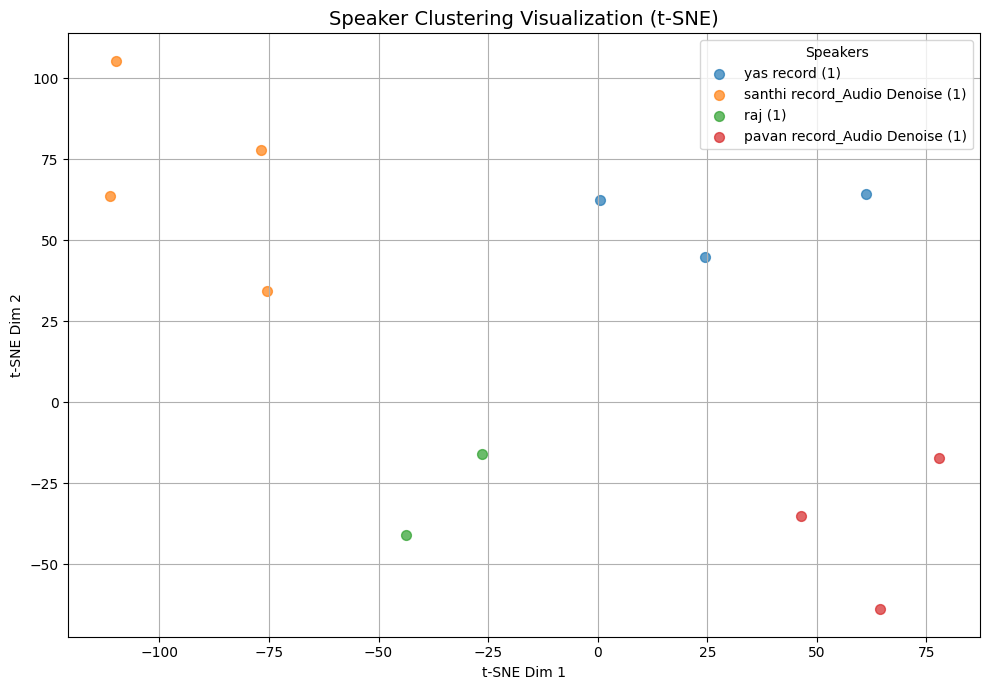

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce embeddings to 2D using t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Create a color palette and speaker label list
unique_speakers = list(set([seg['speaker'] for seg in segments]))
color_palette = sns.color_palette("hsv", len(unique_speakers))
speaker_color_map = {speaker: color_palette[i] for i, speaker in enumerate(unique_speakers)}

# Map each embedding to a color based on speaker
colors = [speaker_color_map[seg['speaker']] for seg in segments]

# Plotting the 2D t-SNE clusters
plt.figure(figsize=(10, 7))
for speaker in unique_speakers:
    indices = [i for i, seg in enumerate(segments) if seg['speaker'] == speaker]
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1],
                label=speaker, s=50, alpha=0.7)

plt.title("Speaker Clustering Visualization (t-SNE)", fontsize=14)
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend(title="Speakers")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Format seconds to HH:MM:SS
def time(secs):
    return datetime.timedelta(seconds=round(secs))

# Write the transcript
with open("transcript_new_final_file.txt", "w") as f:
    for i, segment in enumerate(segments):
        if i == 0 or segments[i - 1]["speaker"] != segment["speaker"]:
            f.write("\n" + segment["speaker"] + " " + str(time(segment["start"])) + '\n')
        f.write(segment["text"][1:] + ' ')


<ipython-input-20-d0e04322698a>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(speaker_names))


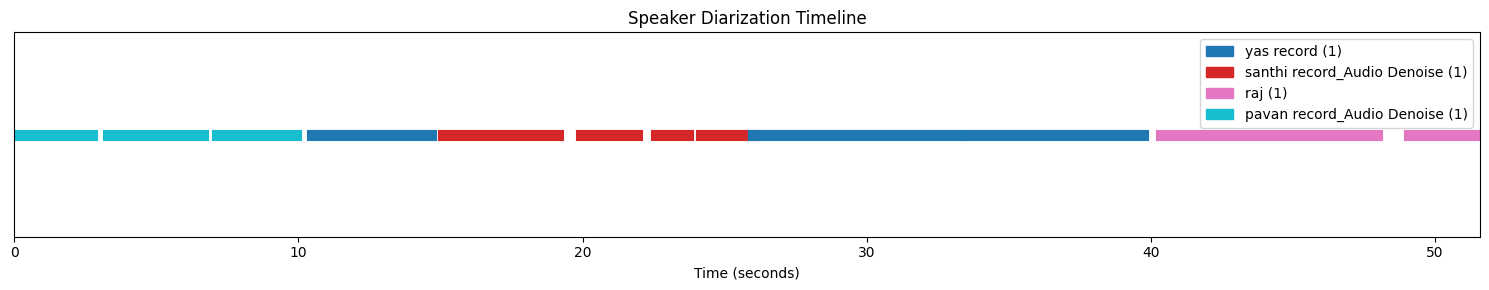

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assign unique colors to each speaker
speaker_names = list(set([seg["speaker"] for seg in segments]))
colors = plt.cm.get_cmap('tab10', len(speaker_names))
speaker_color_map = {name: colors(i) for i, name in enumerate(speaker_names)}

# Create figure
fig, ax = plt.subplots(figsize=(15, 3))

# Plot each segment as a colored block
for segment in segments:
    start = segment["start"]
    end = segment["end"]
    speaker = segment["speaker"]
    ax.plot([start, end], [1, 1], linewidth=8, color=speaker_color_map[speaker])

# Format plot
ax.set_yticks([])
ax.set_xlabel("Time (seconds)")
ax.set_title("Speaker Diarization Timeline")
ax.set_xlim(0, duration)

# Add legend
patches = [mpatches.Patch(color=color, label=speaker) for speaker, color in speaker_color_map.items()]
ax.legend(handles=patches, loc='upper right')

plt.tight_layout()
plt.show()